___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study####

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given.

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_score

from ipywidgets import interact
import warnings
warnings.filterwarnings('ignore')

#### Load Dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [3]:
df.rename(columns={'Annual Income (k$)': 'Annual_Income',
                   'Spending Score (1-100)': 'Spending_Score'},
                   inplace=True)
# made an edit to make it easier when writing column names

In [4]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual_Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending_Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [9]:
df.describe(include="object").T

,count,unique,top,freq
Gender,200,2,Female,112


In [10]:
df.drop(columns="CustomerID", inplace=True)
# CustomerID is like index for us, so drop it.

In [11]:
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [12]:
@interact(col=df.columns[1:], chart=["countplot", "histogram"])
def plot(col, chart):
    colors = np.random.choice(['blue', 'red', 'green'])
    if chart == "countplot":
        plt.figure(figsize=(20, 5))
        ax = sns.countplot(x=col, data=df)
        plt.title(col + ' Countplot')
        plt.xlabel(col)
        ax.bar_label(ax.containers[0])

    else:
        plt.figure(figsize=(20, 5))
        ax = sns.histplot(data=df, x=col, bins=80, kde=True, color=colors)
        plt.title(col + ' Histplot')
        plt.xlabel(col)
        ax.bar_label(ax.containers[0])


#  investigating the age range of the customer group.
#  investigating the annual revenues of customer groups.
#  investigating the spending scores of customer groups.

interactive(children=(Dropdown(description='col', options=('Age', 'Annual_Income', 'Spending_Score'), value='A…

(-1.25, 1.25, -1.25, 1.25)

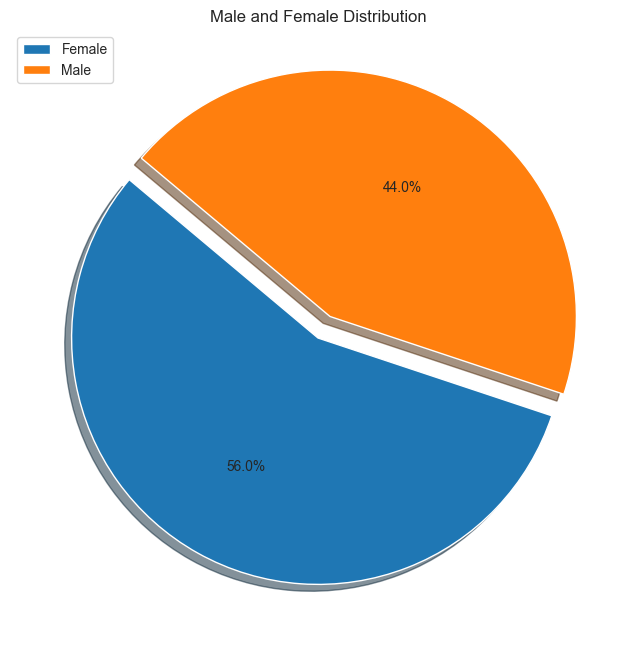

In [13]:
plt.figure(figsize=(8, 8))

explode = [0, 0.1]
plt.pie(df['Gender'].value_counts(),
        explode=explode,
        autopct='%1.1f%%',
        shadow=True,
        startangle=140)
plt.legend(labels=['Female', 'Male'])
plt.title('Male and Female Distribution')
plt.axis('off')
# compare gender ratios, which is one of the important issues in customer segmentation.

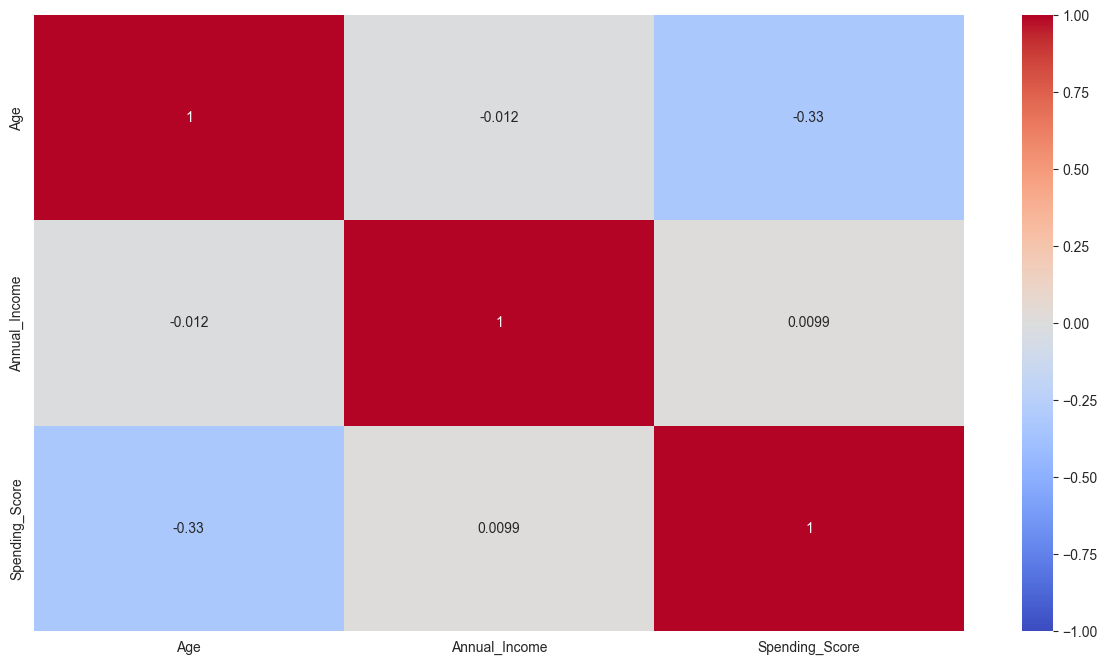

In [14]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.drop(columns = "Gender").corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.show()

# We are investigating how features are correlated to understand how they trending bivariately.

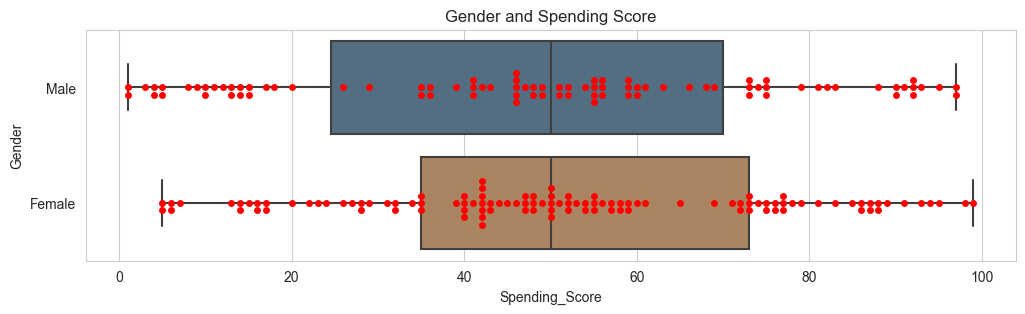

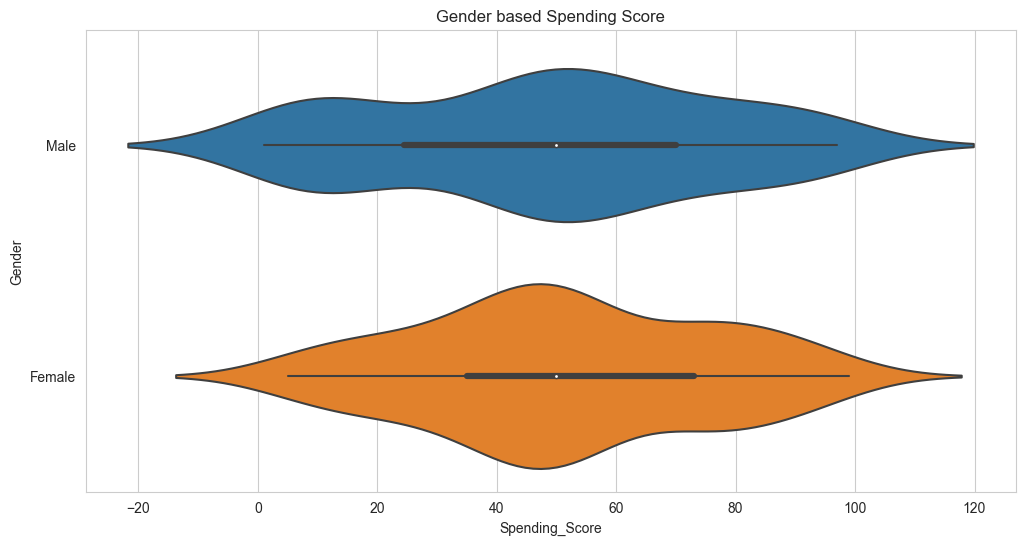

In [15]:
plt.figure(figsize=(12, 3))
sns.swarmplot(x='Spending_Score', y='Gender', data=df, color="r")
sns.boxplot(x='Spending_Score', y='Gender', data=df, saturation=.3)
plt.title('Gender and Spending Score')
plt.show()

# stripplot : used to look at the density of categorical data.

plt.figure(figsize=(12, 6))
sns.violinplot(x='Spending_Score', y='Gender', data=df)
plt.title('Gender based Spending Score')
plt.show()

# With violinplot, u can see the density situation that we can't see in boxplot.

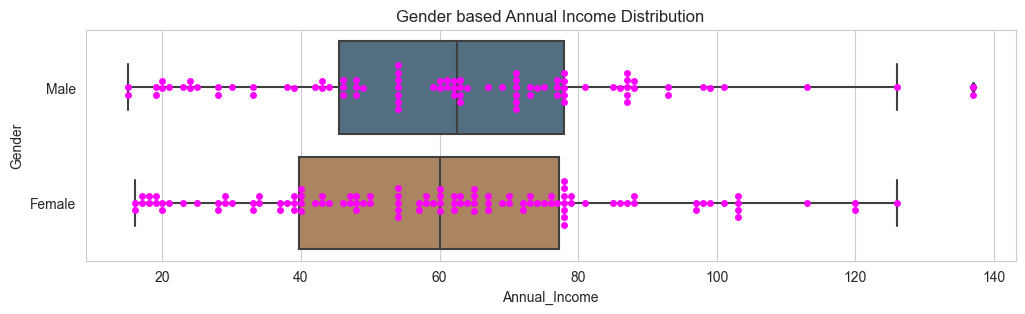

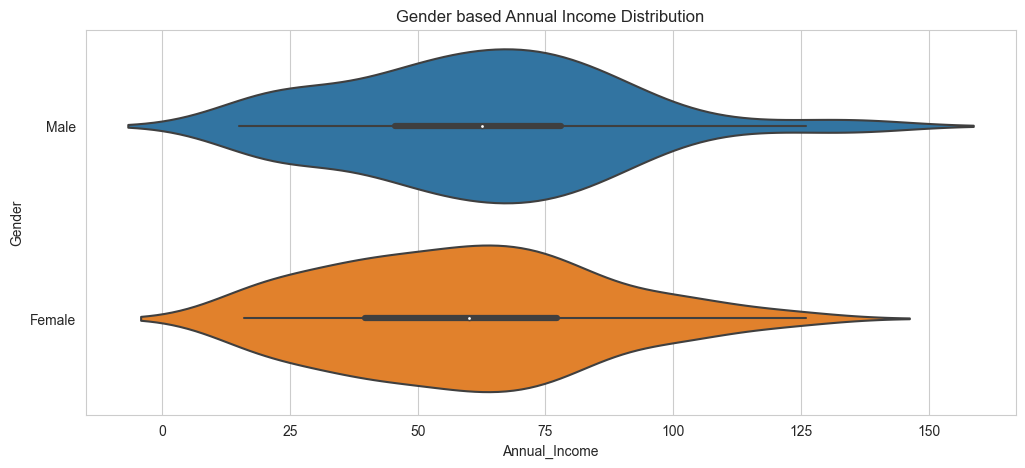

In [16]:
plt.figure(figsize=(12, 3))
sns.swarmplot(x='Annual_Income', y='Gender', data=df, color="magenta")
sns.boxplot(x='Annual_Income', y='Gender', data=df, saturation=0.3)
plt.title('Gender based Annual Income Distribution')
plt.show()

plt.figure(figsize=(12, 5))
sns.violinplot(x='Annual_Income', y='Gender', data=df, orient="h")
plt.title('Gender based Annual Income Distribution')
plt.show()

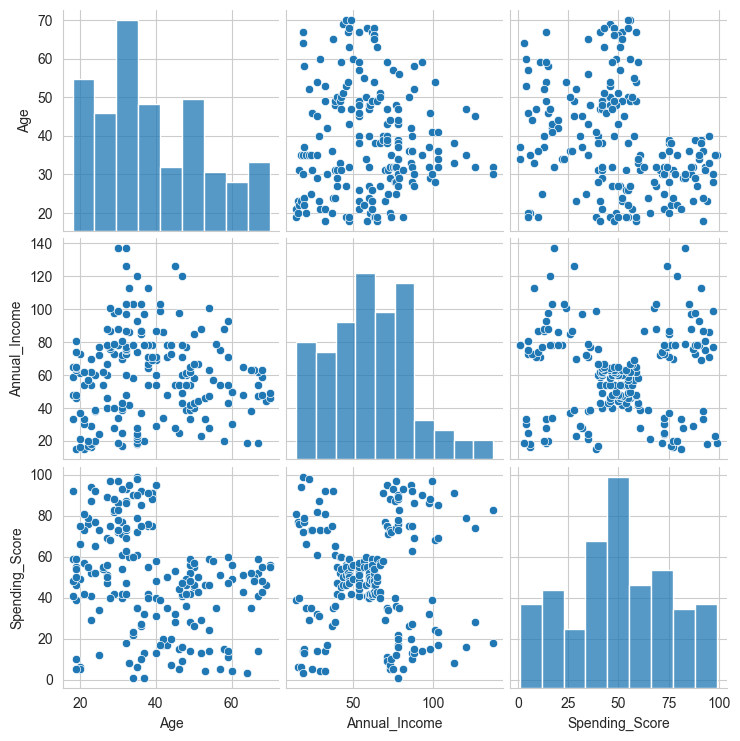

In [17]:
sns.pairplot(df);

#  look at pairplot to get an idea of how many clusters, i can create using which variables.
# Caution : If your data has too many features it is hard to use pairplot. It will take too much time
# You can use PCA(dimension reduction technique) and use 3 to 5 componenets to get insight

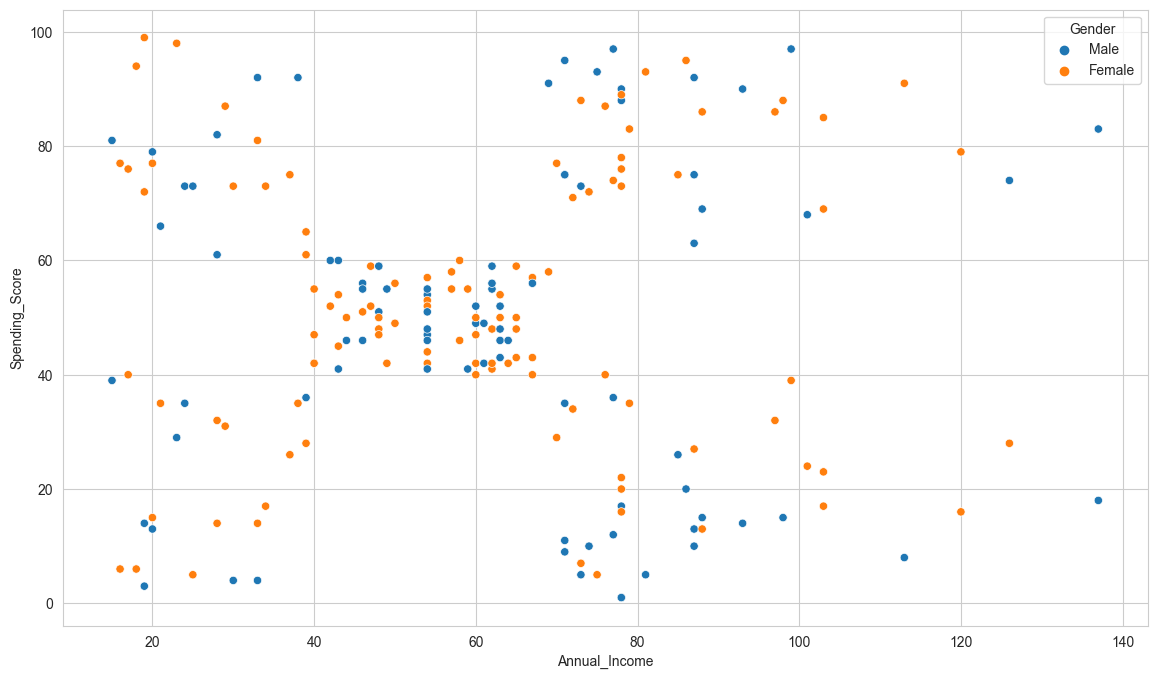

In [18]:
plt.figure(figsize=(14, 8))

sns.scatterplot(x='Annual_Income', y='Spending_Score', data=df, hue="Gender")
plt.show()
#  look at the distribution of gender in the clustering we will create using Annual_Income and Spending_Score,
# which caught our eye above.

---
---

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

## Scaling Data

**The K-means algorithm definitely needs scaling**. However, if all our features are in the same/similar range, **there is no need to scale the data**. For these data, scaling may cause worse results in some cases. You should try data both with and without scale and continue with whichever one has good results.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [19]:
df_2 = df.drop(columns="Gender")
df_2
#  do not use categorical features in k-means algorithms.

,Age,Annual_Income,Spending_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [20]:
# function to compute hopkins's statistic for the dataframe X
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
        X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [21]:
hopkins(df_2, 1)

# With hopkins test, whether the data is uniform or randomly distributed, it returns us a result about it.
# that the closer it is to 1, the more prone to data clustering.

0.6694693140236271

In [22]:
X_age_ss = df.loc[:,['Age','Spending_Score']]
X_age_ss

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [23]:
hopkins(X_age_ss, 1)

0.7195197126585218

#### *ii. Determine optimal number of clusters*

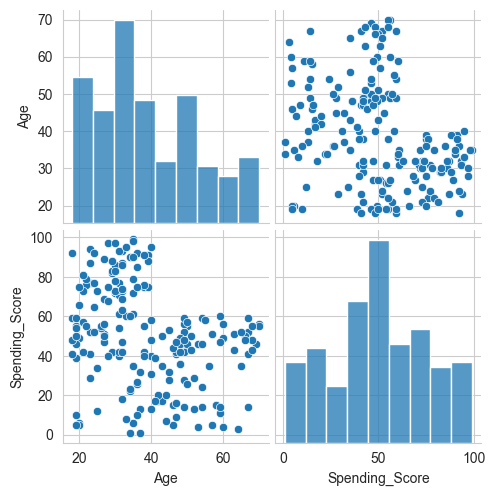

In [24]:
sns.pairplot(X_age_ss);
#  look at the distributions of age and spending score.

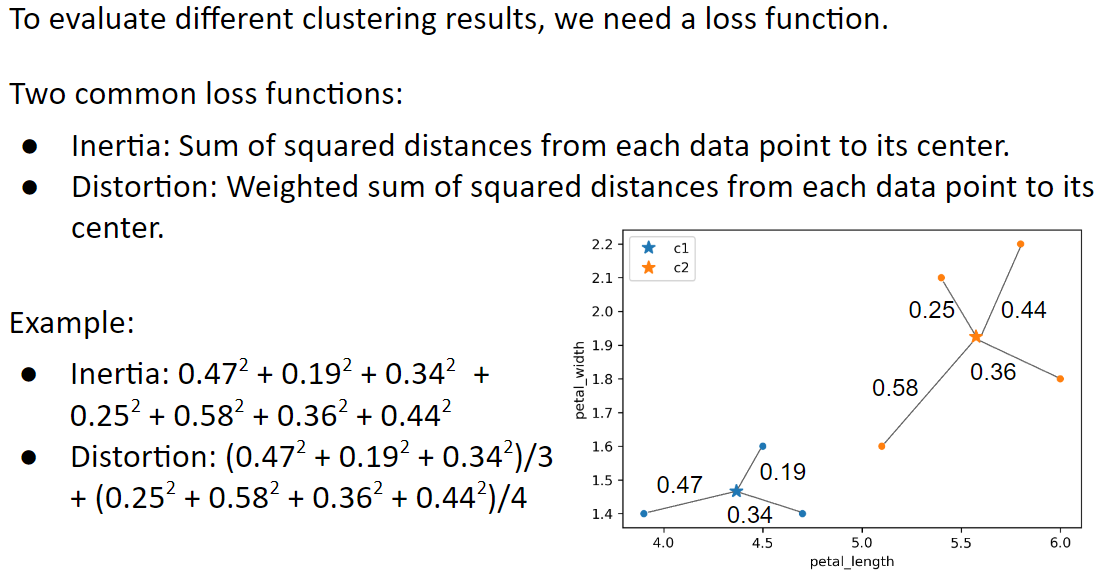

### inertia

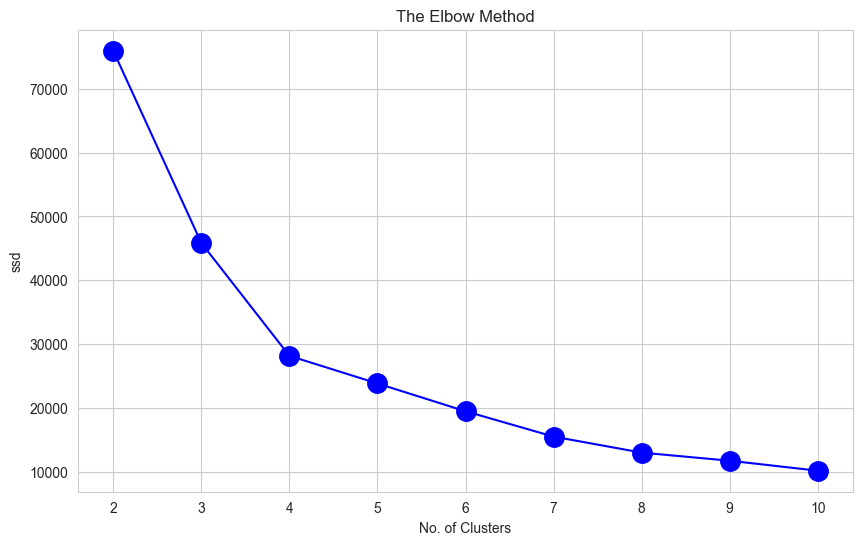

In [25]:
ssd = []
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_age_ss)
    ssd.append(kmeans.inertia_)  # distances from each observation to each cluster centroid

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), ssd, "bo-",  markersize=14.0)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('ssd')
plt.show()
# New paper about elbow method. May be you want to read and try. http://arxiv.org/abs/2212.12189

### distortion

Text(0.5, 1.0, 'elbow method')

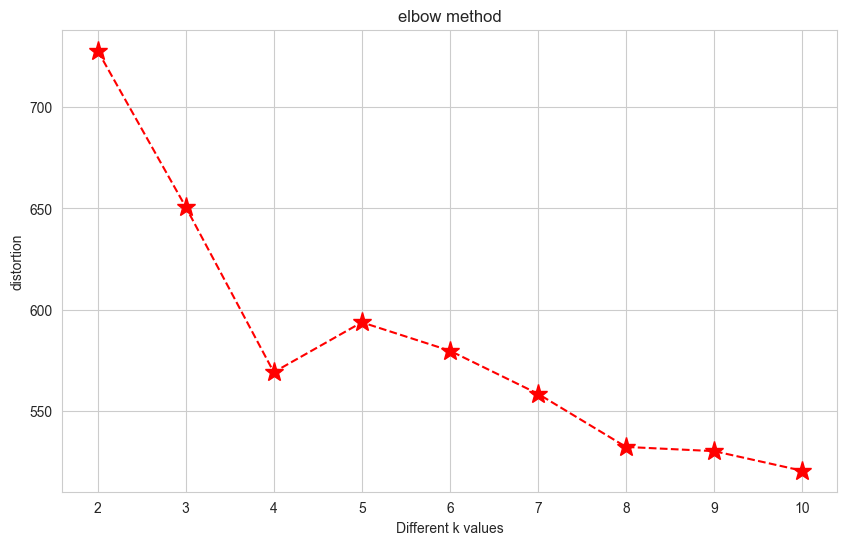

In [26]:
K = range(2, 11)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(X_age_ss)
    distances = kmeanModel.transform(X_age_ss) # distances from each observation to each cluster centroid
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] # distances from observations in each cluster to their own centroid
        result.append(np.mean(cluster_distances ** 2)) # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
    distortion.append(sum(result)) # sum the means of all clusters and add it to the distortion list

plt.figure(figsize=(10,6))
plt.plot(K, distortion, "r*--", markersize=14.0)
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

### silhoutte_score

In [27]:
from sklearn.metrics import silhouette_score

range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_age_ss)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_age_ss, cluster_labels)
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43350225495428363
For n_clusters=6, the silhouette score is 0.4376965763059772
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43215030177487107
For n_clusters=9, the silhouette score is 0.41485342159923116
For n_clusters=10, the silhouette score is 0.4141899863508767


### silhoutte score of each cluster

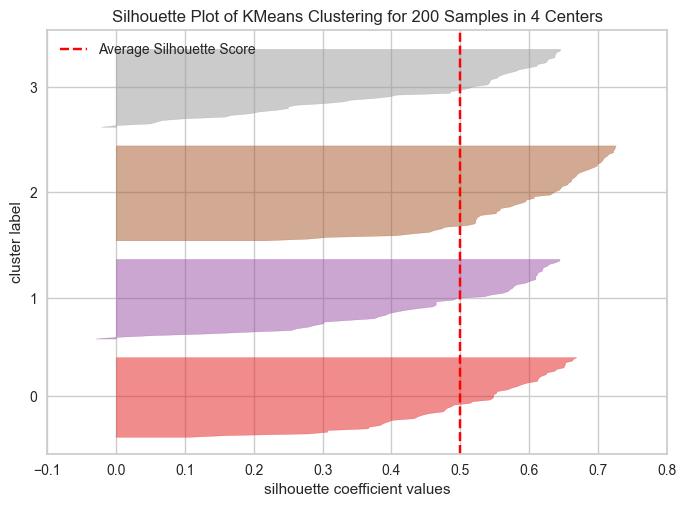

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 200 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [28]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X_age_ss)  # Fit the data to the visualizer
visualizer.poof()

In [29]:
model3.n_clusters
#We can get the number of clusters with .n_clusters.

4

In [30]:
#model3.n_clusters

for i in range(model3.n_clusters):
    label = (model3.labels_ == i)
    print(
        f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}"
    )
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.5091299145013191
mean silhouette score for label 1    : 0.45429047261675404
mean silhouette score for label 2    : 0.5960779476836082
mean silhouette score for label 3    : 0.4197289676734112
mean silhouette score for all labels : 0.49973941540141753


#### *iii. Apply K Means*

In [31]:
kmeans = KMeans(n_clusters=4, random_state=42)

# n_clusters = 4. Since i decided to have 4 clusters according to age and spending score.

In [32]:
kmeans.fit_predict(X_age_ss)

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [33]:
df_age_ss = X_age_ss.copy()
df_age_ss

#  perform the copy operation as i will perform a clustering operation and compare it with Hierarchical Clustering.

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [34]:
df_age_ss["cluster_Kmeans"] = kmeans.fit_predict(X_age_ss) #kmeans.labels_

# Add cluster_Kmeans as a column to df_age_ss.

In [35]:
df_age_ss

,Age,Spending_Score,cluster_Kmeans
0,19,39,3
1,21,81,2
2,20,6,1
3,23,77,2
4,31,40,3
...,...,...,...
195,35,79,2
196,45,28,1
197,32,74,2
198,32,18,1


#### *iv. Visualizing and Labeling All the Clusters*

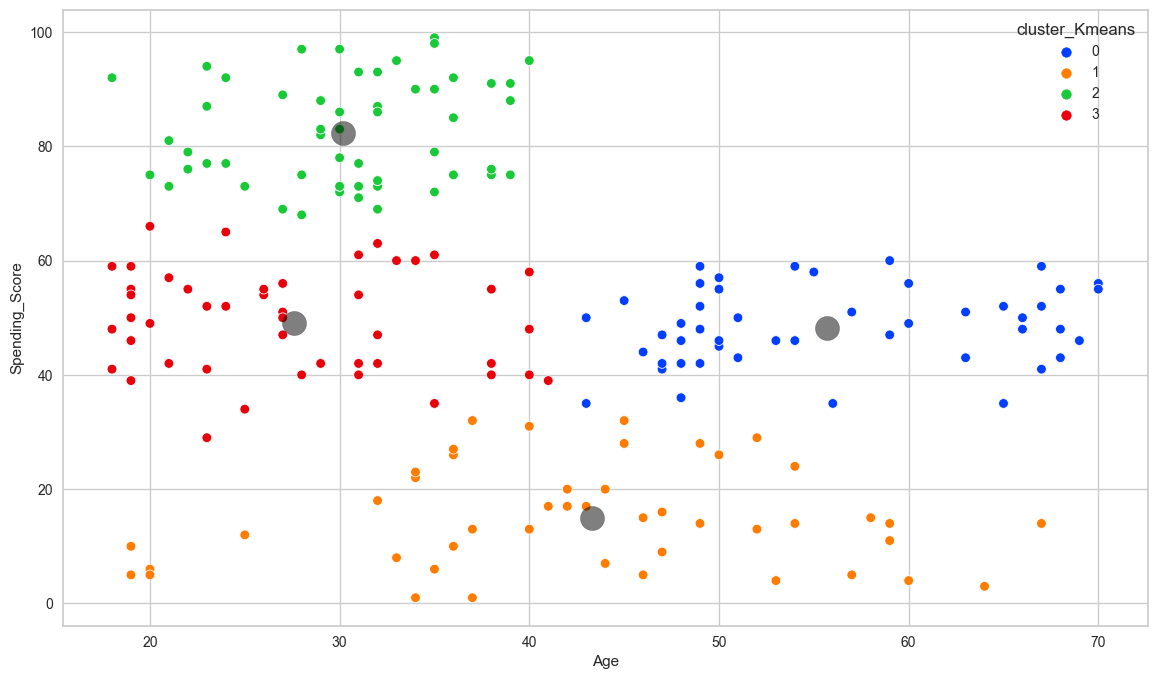

In [36]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='Age',
                y='Spending_Score',
                hue='cluster_Kmeans',
                data=df_age_ss,
                palette="bright")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0],
            centers[:, 1],
            c='black',
            s=300,
            alpha=0.5)
#  look at clusters and centroids formed by age and spending score.

In [37]:
# People show certain shopping behaviors in certain age periods.
# Therefore, the campaigns i will apply to cluster_0 and cluster_3 will not be the same.

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [38]:
X_ai_ss = df[['Annual_Income','Spending_Score']]
X_ai_ss.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [39]:
hopkins(X_ai_ss, 1)

0.6945264652641836

#### *ii. Determine optimal number of clusters*

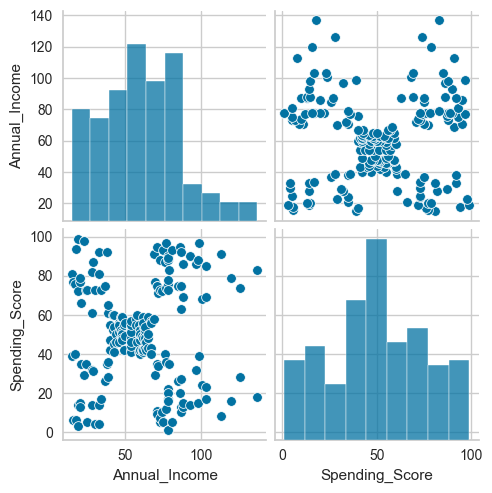

In [40]:
sns.pairplot(X_ai_ss)
#  look at the distributions of Annual_Income and Spending_Score.

### inertia

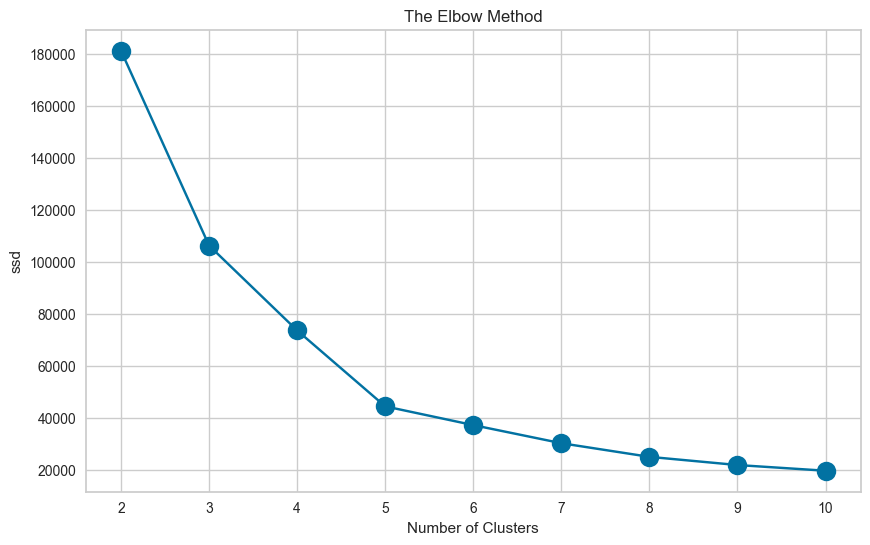

In [41]:
ssd =[]
for n in range(2,11):
    kmeans=KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_ai_ss)
    ssd.append(kmeans.inertia_) # distances from each observation to each cluster centroid
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), ssd, "bo-", markersize=14.0)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('ssd')
plt.show()

### distortion

Text(0.5, 1.0, 'elbow method')

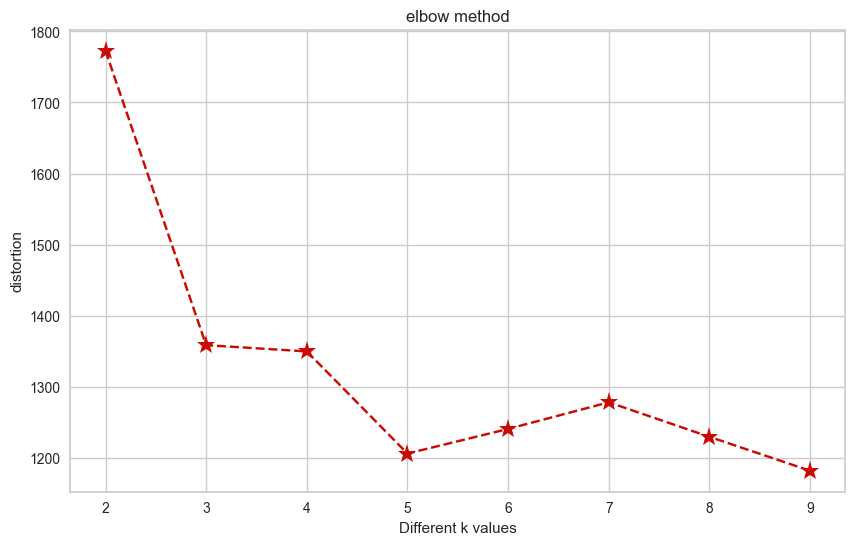

In [42]:
K = range(2, 10)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(X_ai_ss)
    distances = kmeanModel.transform(X_ai_ss) # distances from each observation to each cluster centroid
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] # distances from observations in each cluster to their own centroid
        result.append(np.mean(cluster_distances ** 2)) # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
    distortion.append(sum(result)) # sum the means of all clusters and add it to the distortion list

plt.figure(figsize=(10,6))
plt.plot(K, distortion, "r*--", markersize=14.0)
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

### silhouette_score

In [43]:
from sklearn.metrics import silhouette_score

range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_ai_ss)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_ai_ss, cluster_labels)
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5264283703685728
For n_clusters=8, the silhouette score is 0.45827056882053113
For n_clusters=9, the silhouette score is 0.4553729779390266
For n_clusters=10, the silhouette score is 0.45925273534781125


### silhouette_score of each cluster

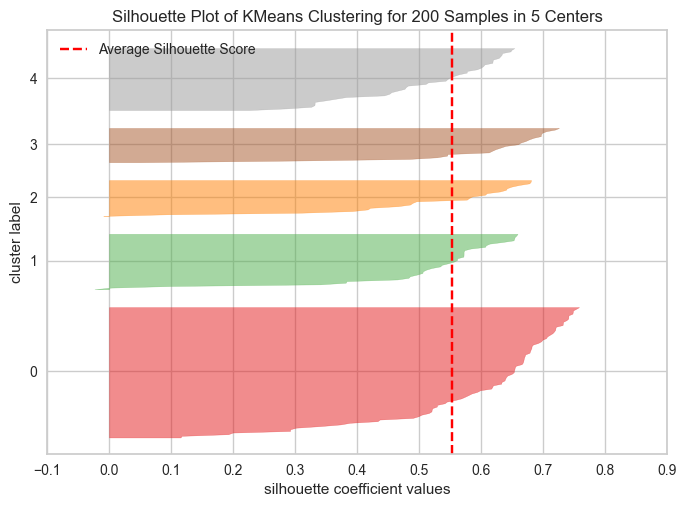

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 200 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [44]:
model4 = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model4)

visualizer.fit(X_ai_ss)  # Fit the data to the visualizer
visualizer.poof()

In [45]:
# The number of samples of cluster 0 is higher than other clusters

In [46]:
#model3.n_clusters

for i in range(model4.n_clusters):
    label = (model4.labels_ == i)
    print(
        f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}"
    )
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.5966512190217801
mean silhouette score for label 1    : 0.5039873487056818
mean silhouette score for label 2    : 0.5122676140736505
mean silhouette score for label 3    : 0.5990128687006722
mean silhouette score for label 4    : 0.5091706489322517
mean silhouette score for all labels : 0.553931997444648


#### *iii. Apply K Means*

In [47]:
kmeans2 = KMeans(n_clusters=5, random_state=42)
kmeans2.fit_predict(X_ai_ss)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [48]:
df_ai_ss = X_ai_ss.copy()
df_ai_ss.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [49]:
df_ai_ss['cluster_Kmeans'] = kmeans2.fit_predict(X_ai_ss) #kmeans2.labels_
df_ai_ss

,Annual_Income,Spending_Score,cluster_Kmeans
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2
...,...,...,...
195,120,79,4
196,126,28,1
197,126,74,4
198,137,18,1


#### *iv. Visualizing and Labeling All the Clusters*

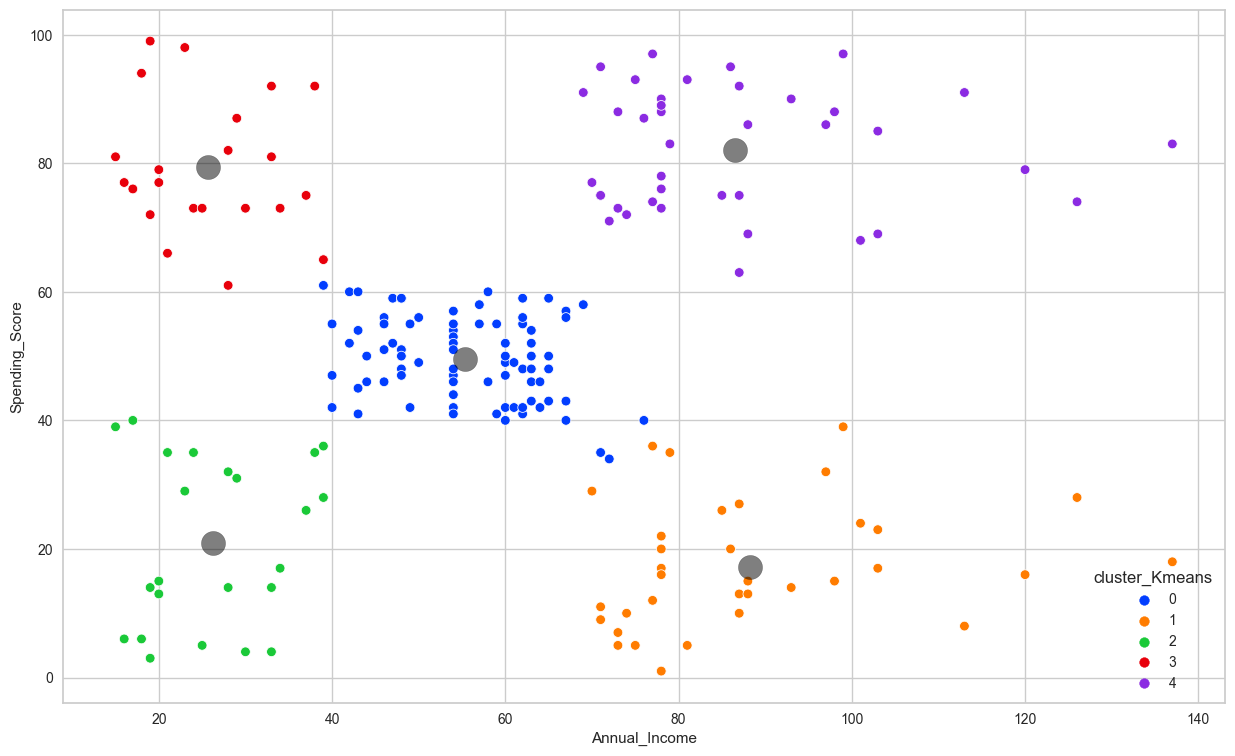

In [50]:
plt.figure(figsize=(15, 9))
sns.scatterplot(x='Annual_Income',
                y='Spending_Score',
                hue='cluster_Kmeans',
                data=df_ai_ss,
                palette="bright")
centers = kmeans2.cluster_centers_
plt.scatter(centers[:, 0],
            centers[:, 1],
            c='black',
            s=300,
            alpha=0.5)

#  look at the clusters and centroids formed according to Annual_Income and Spending_Score.

#### We have made our inferences on the Kmeans algorithm so far, and we will take and compare the results with another clustering algorithm, Hierarchical Clustering:


### The point we need to pay attention to is the number of clusters in kmeans so that we can find the differences.

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score

In [51]:
X_age_ss

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [52]:
from scipy.cluster.hierarchy import linkage

# In order to draw a dendrogram, it's not enough to give the data directly,  have to use linkage.

In [53]:
from scipy.cluster.hierarchy import dendrogram

### Dendrogram

In [54]:
@interact(method=["ward", "complete", "average", "single"])
def dendogramer(method):
    link = linkage(y=X_age_ss, method=method)
    plt.figure(figsize=(20, 10))
    plt.title("Dendogram")
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(link,
               truncate_mode="lastp",
               p=10,
               show_contracted=True,
               leaf_font_size=10)

interactive(children=(Dropdown(description='method', options=('ward', 'complete', 'average', 'single'), value=…

* Let's pay attention to the scales.

In [55]:
# Recommended us 2 clusters, but considering the distances between clusters, it recommends 2 . For that reason ;


### silhouette_score

In [56]:
range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X_age_ss)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_age_ss, cluster_labels)
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )

For n_clusters=2, the silhouette score is 0.4549465643222241
For n_clusters=3, the silhouette score is 0.4411791686353356
For n_clusters=4, the silhouette score is 0.4602496389565028
For n_clusters=5, the silhouette score is 0.40374071753059787
For n_clusters=6, the silhouette score is 0.4125958704145705
For n_clusters=7, the silhouette score is 0.4158977524079244
For n_clusters=8, the silhouette score is 0.3883688959732531
For n_clusters=9, the silhouette score is 0.3948151533262091
For n_clusters=10, the silhouette score is 0.3876666104778445


## Clustering based on Annual Income and Spending Score

In [57]:
X_ai_ss

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


### Dendrogram

In [58]:
@interact(method=["ward", "complete", "average", "single"])
def dendogramer(method):
    link = linkage(y=X_ai_ss, method=method)
    plt.figure(figsize=(20, 10))
    plt.title("Dendogram")
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(link,
               truncate_mode="lastp",
               p=10,
               show_contracted=True,
               leaf_font_size=10)

interactive(children=(Dropdown(description='method', options=('ward', 'complete', 'average', 'single'), value=…

### silhouette_score

In [59]:
range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X_ai_ss)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_ai_ss, cluster_labels)
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )

For n_clusters=2, the silhouette score is 0.36706444723912895
For n_clusters=3, the silhouette score is 0.4618340266628975
For n_clusters=4, the silhouette score is 0.4916598193892782
For n_clusters=5, the silhouette score is 0.5529945955148897
For n_clusters=6, the silhouette score is 0.5380208285578872
For n_clusters=7, the silhouette score is 0.519904611908887
For n_clusters=8, the silhouette score is 0.4326286245782246
For n_clusters=9, the silhouette score is 0.43892545672004507
For n_clusters=10, the silhouette score is 0.4342656377895271


### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score

In [60]:
X_age_ss

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [61]:
Agg1 = AgglomerativeClustering(
    n_clusters=4,
    metric=
    'euclidean',  # If linkage = "ward" then metric='euclidean' is required.
    linkage='ward')  # originating from the formulation of variance...
y_agg = Agg1.fit_predict(X_age_ss)

In [62]:
df_age_ss

,Age,Spending_Score,cluster_Kmeans
0,19,39,3
1,21,81,2
2,20,6,1
3,23,77,2
4,31,40,3
...,...,...,...
195,35,79,2
196,45,28,1
197,32,74,2
198,32,18,1


In [63]:
df_age_ss['cluster_Agg'] = y_agg
df_age_ss.head()

,Age,Spending_Score,cluster_Kmeans,cluster_Agg
0,19,39,3,0
1,21,81,2,3
2,20,6,1,2
3,23,77,2,3
4,31,40,3,0


#### Annual Income and Spending Score

In [64]:
X_ai_ss

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [65]:
Agg2 = AgglomerativeClustering(n_clusters=5,
                               metric='euclidean',
                               linkage='ward')
y_agg2 = Agg2.fit_predict(X_ai_ss)

In [66]:
df_ai_ss

,Annual_Income,Spending_Score,cluster_Kmeans
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2
...,...,...,...
195,120,79,4
196,126,28,1
197,126,74,4
198,137,18,1


In [67]:
df_ai_ss['cluster_Agg'] = y_agg2
df_ai_ss.head()

,Annual_Income,Spending_Score,cluster_Kmeans,cluster_Agg
0,15,39,2,4
1,15,81,3,3
2,16,6,2,4
3,16,77,3,3
4,17,40,2,4


In [68]:
# labels are different but their locations are almost the same (cluster_Kmeans - cluster_Agg)

### iii. *Visualizing and Labeling All the Clusters*

#### Age and Spending Score

In [69]:
df_age_ss

,Age,Spending_Score,cluster_Kmeans,cluster_Agg
0,19,39,3,0
1,21,81,2,3
2,20,6,1,2
3,23,77,2,3
4,31,40,3,0
...,...,...,...,...
195,35,79,2,3
196,45,28,1,0
197,32,74,2,3
198,32,18,1,2


<AxesSubplot: xlabel='Age', ylabel='Spending_Score'>

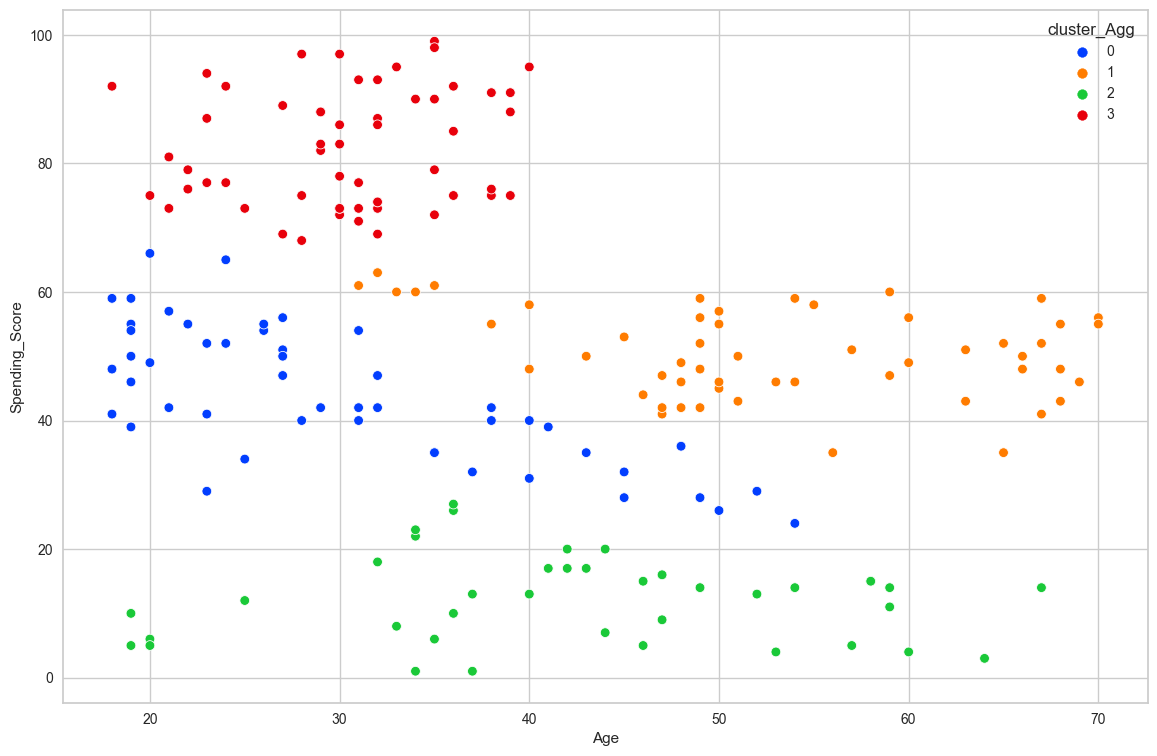

In [70]:
plt.figure(figsize=(14, 9))
sns.scatterplot(x='Age',
                y='Spending_Score',
                hue='cluster_Agg',
                data=df_age_ss,
                palette="bright")

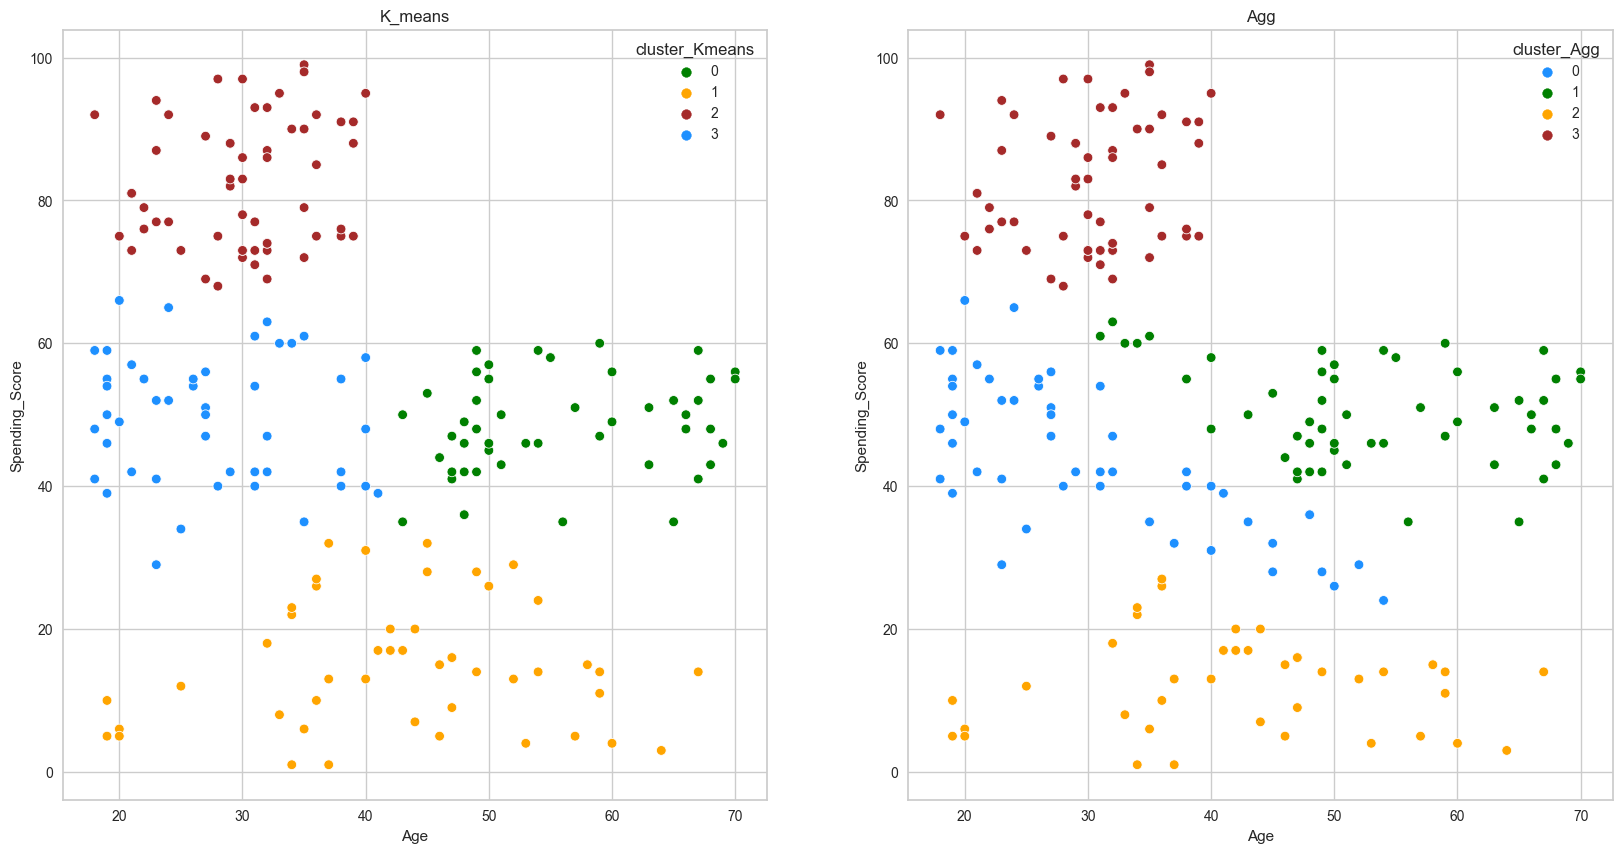

In [71]:
plt.figure(figsize=(20, 10))

plt.subplot(121)
sns.scatterplot(x='Age',
                y='Spending_Score',
                hue='cluster_Kmeans',
                data=df_age_ss,
                palette=['green', 'orange', 'brown', 'dodgerblue'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='Age',
                y='Spending_Score',
                hue='cluster_Agg',
                data=df_age_ss,
                palette=['dodgerblue', 'green', 'orange', 'brown'])
plt.title("Agg");

In [72]:
# Hierarchical Clustering has not drawn the cluster boundaries sharply.
# It is necessary to pay attention to this. Kmeans is better separated.

#### Annual Income and Spending Score

In [73]:
df_ai_ss

,Annual_Income,Spending_Score,cluster_Kmeans,cluster_Agg
0,15,39,2,4
1,15,81,3,3
2,16,6,2,4
3,16,77,3,3
4,17,40,2,4
...,...,...,...,...
195,120,79,4,2
196,126,28,1,0
197,126,74,4,2
198,137,18,1,0


<AxesSubplot: xlabel='Annual_Income', ylabel='Spending_Score'>

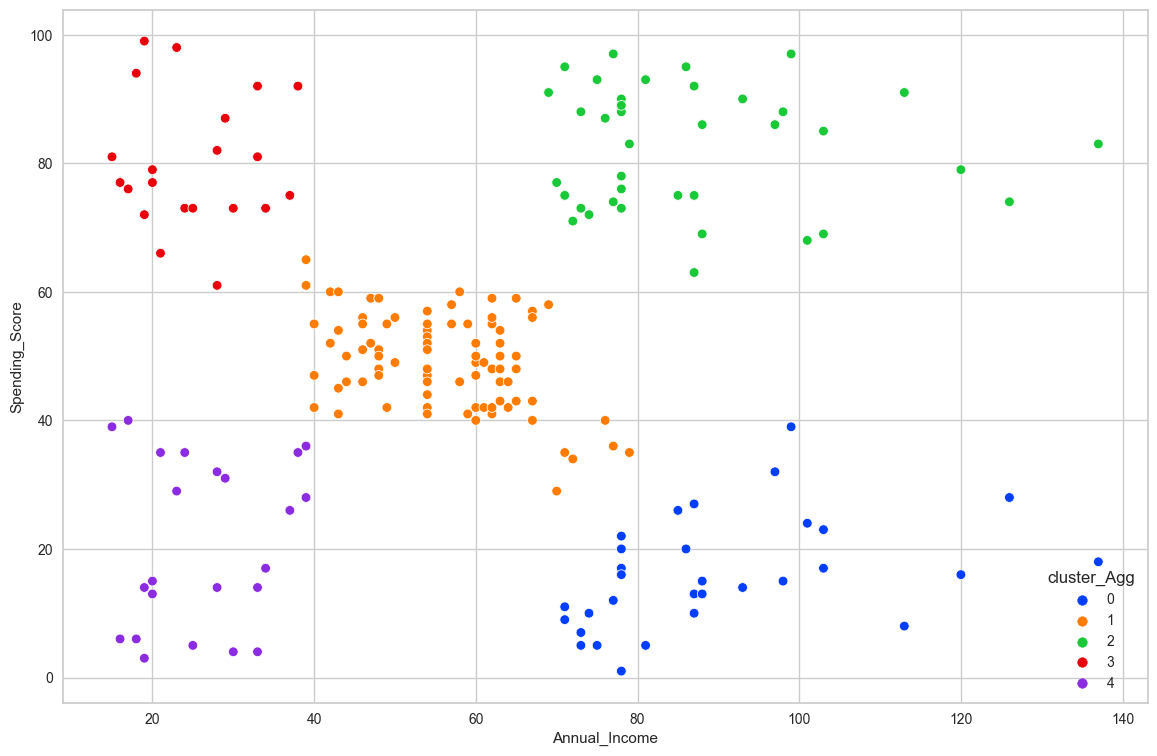

In [74]:
plt.figure(figsize=(14,9))
sns.scatterplot(x='Annual_Income',
                y='Spending_Score',
                hue='cluster_Agg',
                data=df_ai_ss ,
                palette="bright")

Text(0.5, 1.0, 'Agg')

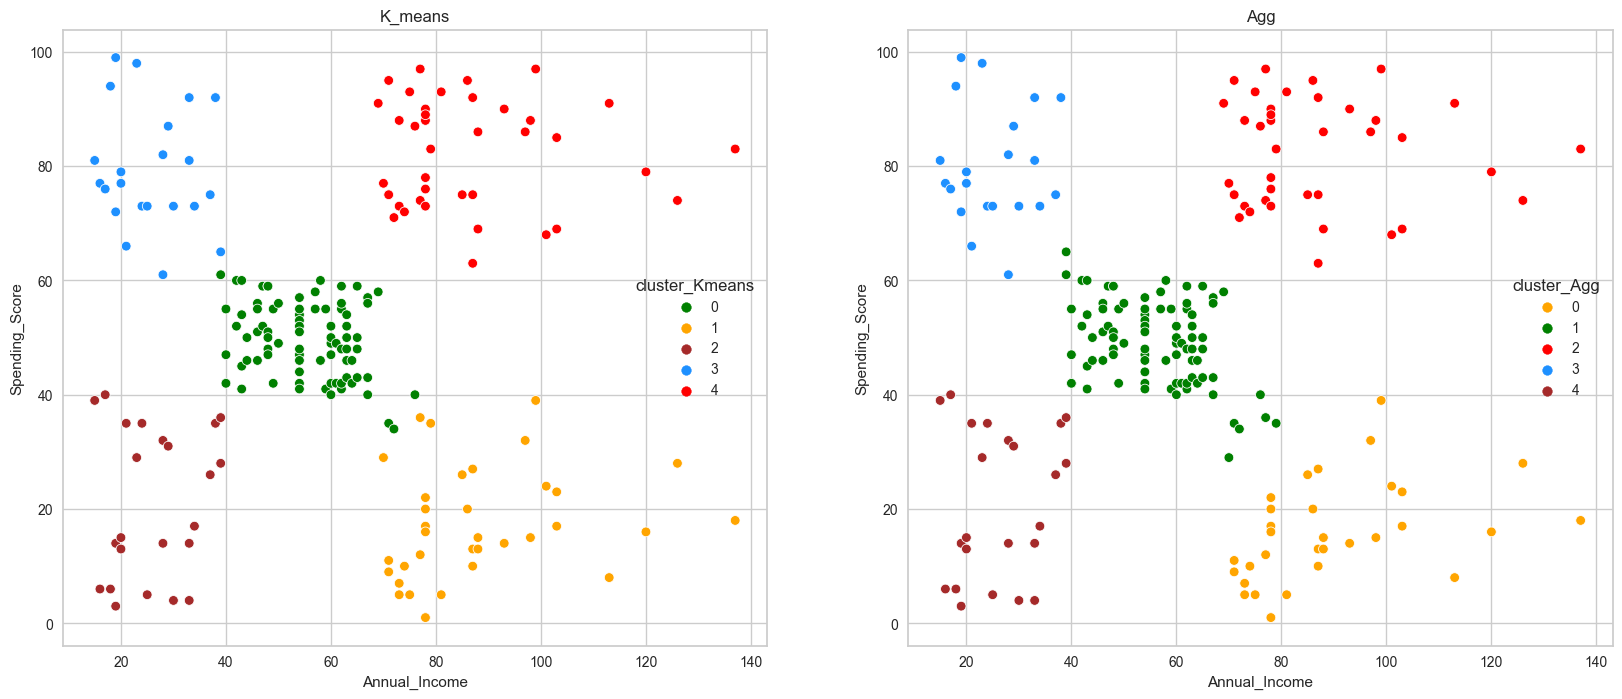

In [75]:
plt.figure(figsize=(20, 8))

plt.subplot(121)
sns.scatterplot(x='Annual_Income',
                y='Spending_Score',
                hue='cluster_Kmeans',
                data=df_ai_ss,
                palette=['green', 'orange', 'brown', 'dodgerblue', 'red'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='Annual_Income',
                y='Spending_Score',
                hue='cluster_Agg',
                data=df_ai_ss,
                palette=['orange', 'green', 'red', 'dodgerblue', 'brown'])
plt.title("Agg")

In [76]:
# There are healthier transitions in Kmeans
#  chose the Kmeans algorithm finally

#### Interpretation based on Age and Spending Score

In [77]:
df_age_ss

,Age,Spending_Score,cluster_Kmeans,cluster_Agg
0,19,39,3,0
1,21,81,2,3
2,20,6,1,2
3,23,77,2,3
4,31,40,3,0
...,...,...,...,...
195,35,79,2,3
196,45,28,1,0
197,32,74,2,3
198,32,18,1,2


[Text(0, 0, '57'), Text(0, 0, '48'), Text(0, 0, '48'), Text(0, 0, '47')]

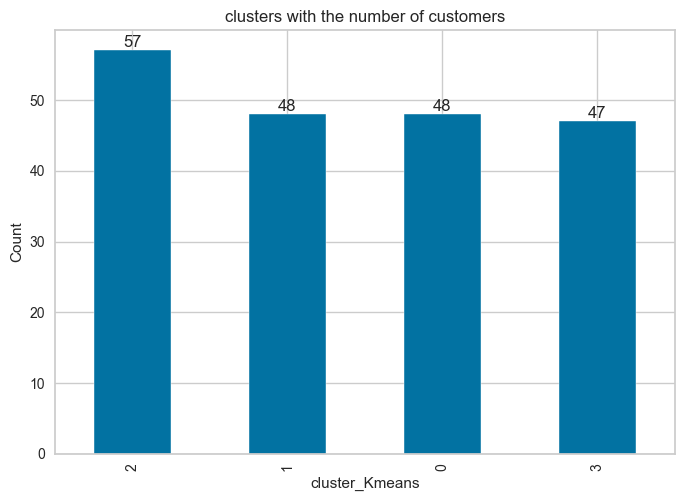

In [78]:
#  number of poeple lie in each group
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = df_age_ss.cluster_Kmeans.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])

In [79]:
df["cluster_Age_Spending_Score"] = df_age_ss.cluster_Kmeans
df.head()

#  add clusters resulting from Kmeans to our df (age-spending score)

,Gender,Age,Annual_Income,Spending_Score,cluster_Age_Spending_Score
0,Male,19,15,39,3
1,Male,21,15,81,2
2,Female,20,16,6,1
3,Female,23,16,77,2
4,Female,31,17,40,3


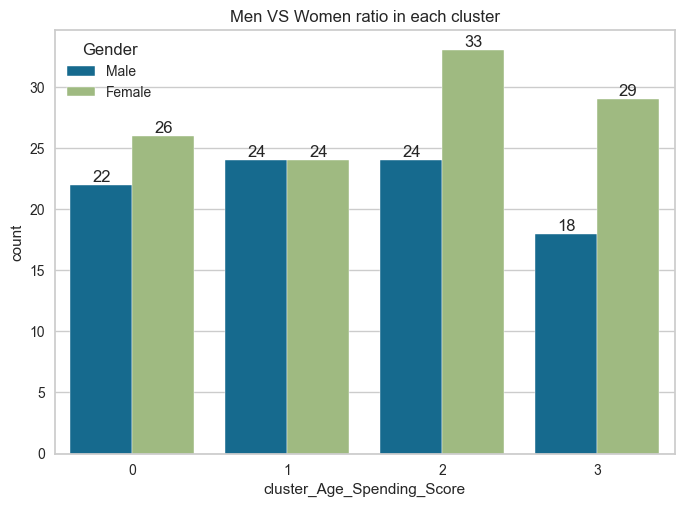

In [80]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax = sns.countplot(x=df.cluster_Age_Spending_Score, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)
#  count clusters according to gender.

In [81]:
# 2 and 3 clusters draw attention to the excess of women.

In [82]:
df.drop(columns = 'Gender').groupby("cluster_Age_Spending_Score").mean()
#  group them according to the clusters formed.

,Age,Annual_Income,Spending_Score
cluster_Age_Spending_Score,,,
0,55.708333,54.770833,48.229167
1,43.291667,66.937500,15.020833
2,30.175439,66.070175,82.350877
3,27.617021,53.276596,49.148936


<AxesSubplot: xlabel='cluster_Age_Spending_Score', ylabel='Spending_Score'>

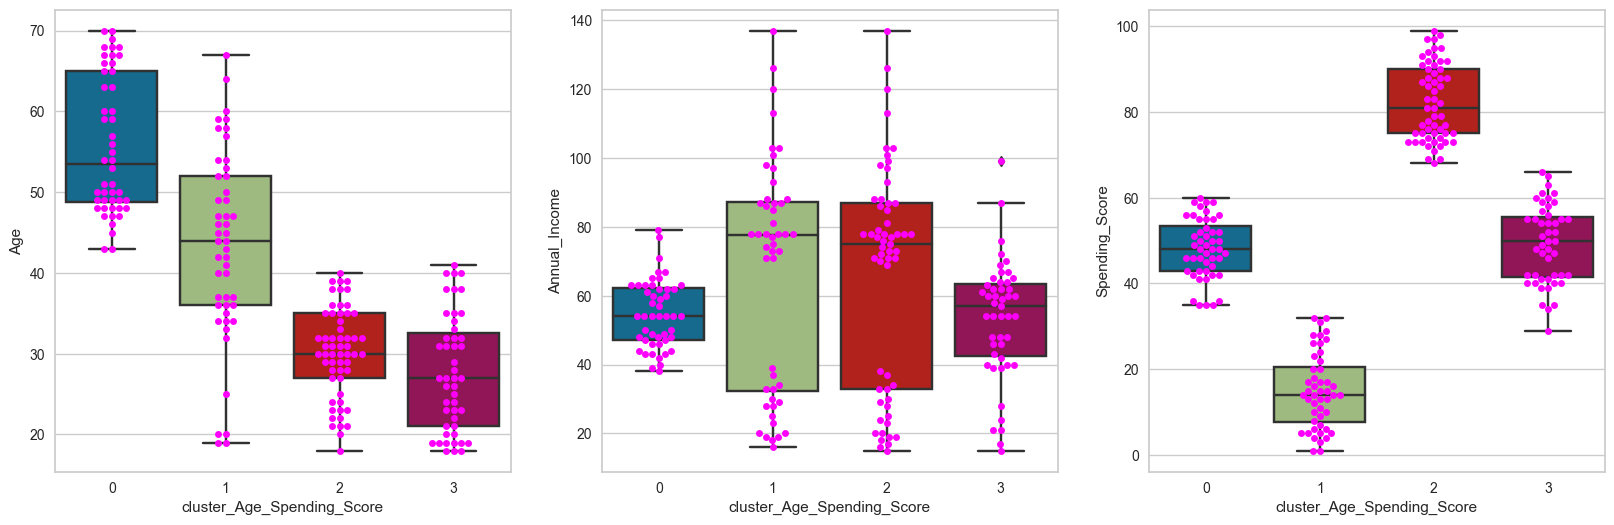

In [83]:
plt.figure(figsize=(20, 6))

plt.subplot(131)
sns.boxplot(y="Age", x="cluster_Age_Spending_Score", data=df)
sns.swarmplot(y="Age",
              x="cluster_Age_Spending_Score",
              data=df,
              color="magenta")

plt.subplot(132)
sns.boxplot(y="Annual_Income", x="cluster_Age_Spending_Score", data=df)
sns.swarmplot(y="Annual_Income",
              x="cluster_Age_Spending_Score",
              data=df,
              color="magenta")

plt.subplot(133)
sns.boxplot(y="Spending_Score", x="cluster_Age_Spending_Score", data=df)
sns.swarmplot(y="Spending_Score",
              x="cluster_Age_Spending_Score",
              data=df,
              color="magenta")

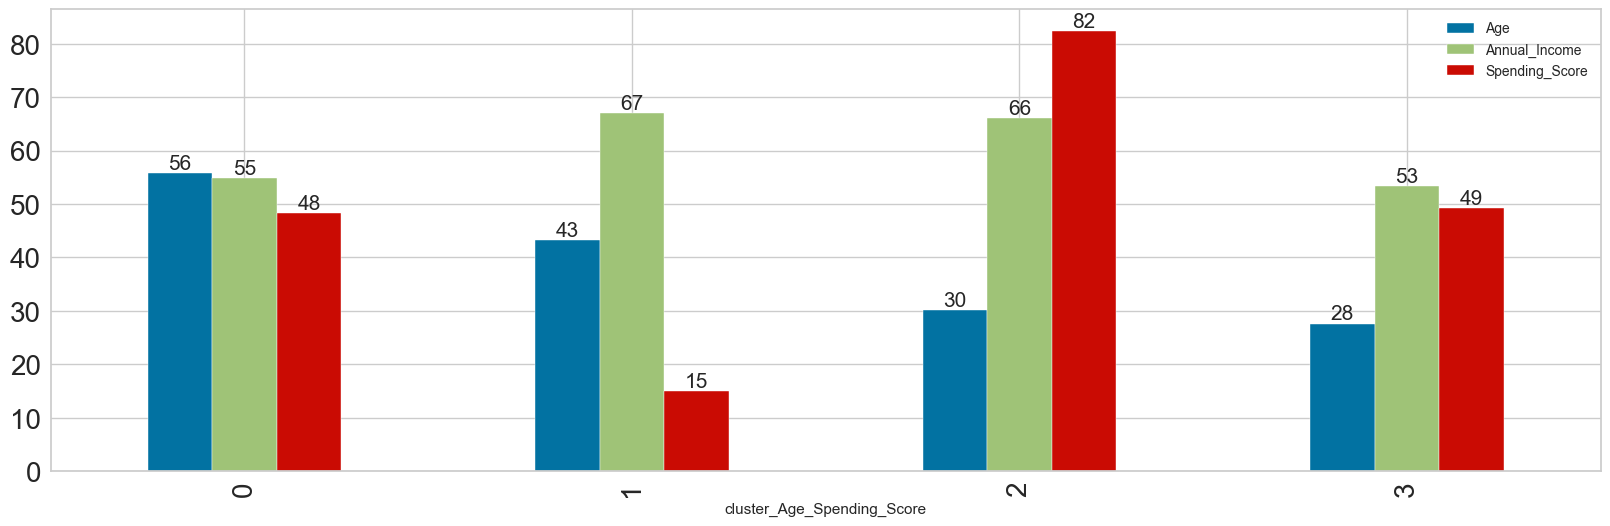

In [84]:
ax = df.drop(columns = 'Gender').groupby("cluster_Age_Spending_Score").mean().plot(kind='bar',
                                                          figsize=(20, 6),
                                                          fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=15)

# Note using df.groupby("cluster_Age_Spending_Score").mean().

### Conclusion

**cluster 0** : The average age is around 56. both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 43. the annula_income is high but the spending_scores are very low.
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 28. Both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score

In [85]:
df_ai_ss

,Annual_Income,Spending_Score,cluster_Kmeans,cluster_Agg
0,15,39,2,4
1,15,81,3,3
2,16,6,2,4
3,16,77,3,3
4,17,40,2,4
...,...,...,...,...
195,120,79,4,2
196,126,28,1,0
197,126,74,4,2
198,137,18,1,0


In [86]:
df_ai_ss.cluster_Kmeans.value_counts()

cluster_Kmeans
0    81
4    39
1    35
2    23
3    22
Name: count, dtype: int64

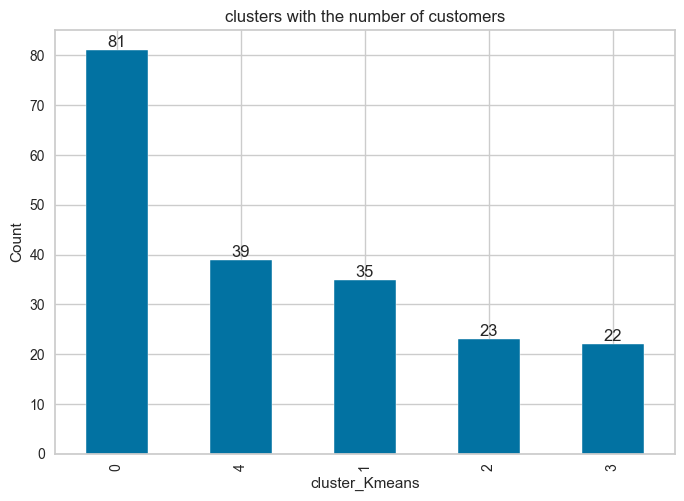

In [87]:
#  number of poeple lie in each group
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = df_ai_ss.cluster_Kmeans.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0]);

In [88]:
df.head()

,Gender,Age,Annual_Income,Spending_Score,cluster_Age_Spending_Score
0,Male,19,15,39,3
1,Male,21,15,81,2
2,Female,20,16,6,1
3,Female,23,16,77,2
4,Female,31,17,40,3


In [89]:
df.drop(columns="cluster_Age_Spending_Score", inplace=True)

# According to Annual_Income and Spending_Score,
# drop the cluster_Age_Spending_Score to get results according to the clusters , created with Kmeans.

In [90]:
df["cluster_Annual_Income_Spending_Score"] = df_ai_ss.cluster_Kmeans
df.head()
# Add cluster_Annual_Income_Spending_Score column.

,Gender,Age,Annual_Income,Spending_Score,cluster_Annual_Income_Spending_Score
0,Male,19,15,39,2
1,Male,21,15,81,3
2,Female,20,16,6,2
3,Female,23,16,77,3
4,Female,31,17,40,2


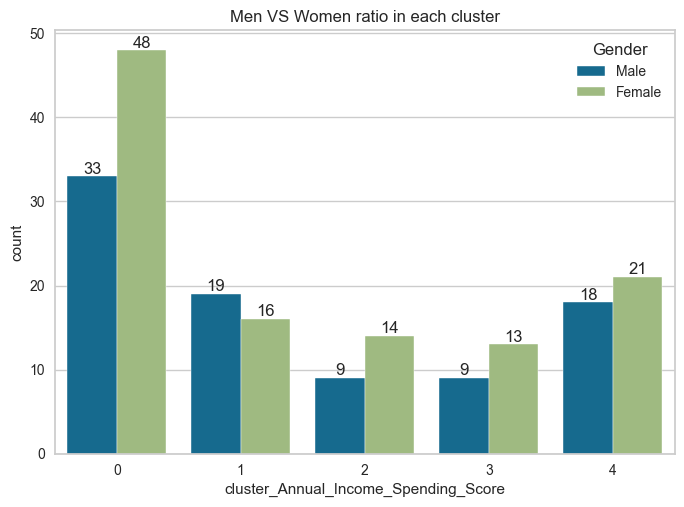

In [91]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df.cluster_Annual_Income_Spending_Score, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)

In [92]:
df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean()

#  group df by both Gender and cluster_Annual_Income_Spending_Score.

Age  Annual_Income  \
Gender cluster_Annual_Income_Spending_Score                             
Female 0                                     40.895833      55.354167   
       1                                     43.250000      90.937500   
       2                                     43.214286      27.357143   
       3                                     25.461538      25.692308   
       4                                     32.190476      86.047619   
Male   0                                     45.363636      55.212121   
       1                                     39.315789      85.894737   
       2                                     48.333333      24.666667   
       3                                     25.000000      25.777778   
       4                                     33.277778      87.111111   

                                             Spending_Score  
Gender cluster_Annual_Income_Spending_Score                  
Female 0                                          49.000000  
       1                                          22.062500  
       2                                          21.714286  
       3                                          80.538462  
       4                                          81.666667  
Male   0                                          50.272727  
       1                                          12.947368  
       2                                          19.666667  
       3                                          77.666667  
       4                                          82.666667

<AxesSubplot: xlabel='cluster_Annual_Income_Spending_Score', ylabel='Spending_Score'>

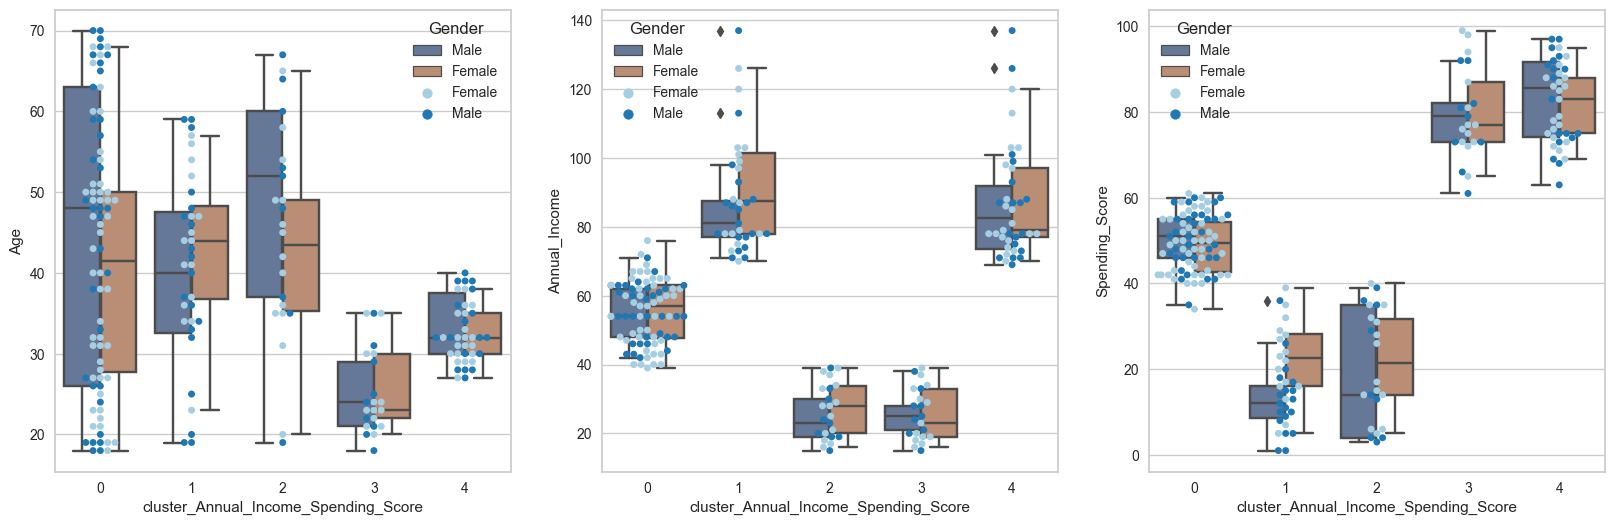

In [93]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y="Age", x="cluster_Annual_Income_Spending_Score",
            hue= "Gender", data = df,palette="deep",saturation=0.5)
sns.swarmplot(y = "Age", x = "cluster_Annual_Income_Spending_Score",
              hue= "Gender", data = df,palette=sns.color_palette("Paired"))

plt.subplot(132)
sns.boxplot(y="Annual_Income", x="cluster_Annual_Income_Spending_Score",
            hue="Gender", data = df, palette="deep",saturation=0.5)
sns.swarmplot(y = "Annual_Income", x = "cluster_Annual_Income_Spending_Score",
              hue= "Gender", data = df,palette=sns.color_palette("Paired"))

plt.subplot(133)
sns.boxplot(y="Spending_Score", x="cluster_Annual_Income_Spending_Score",
            hue="Gender", data=df, palette="deep",saturation=0.5);
sns.swarmplot(y = "Spending_Score", x = "cluster_Annual_Income_Spending_Score",
              hue= "Gender", data = df,palette=sns.color_palette("Paired"))

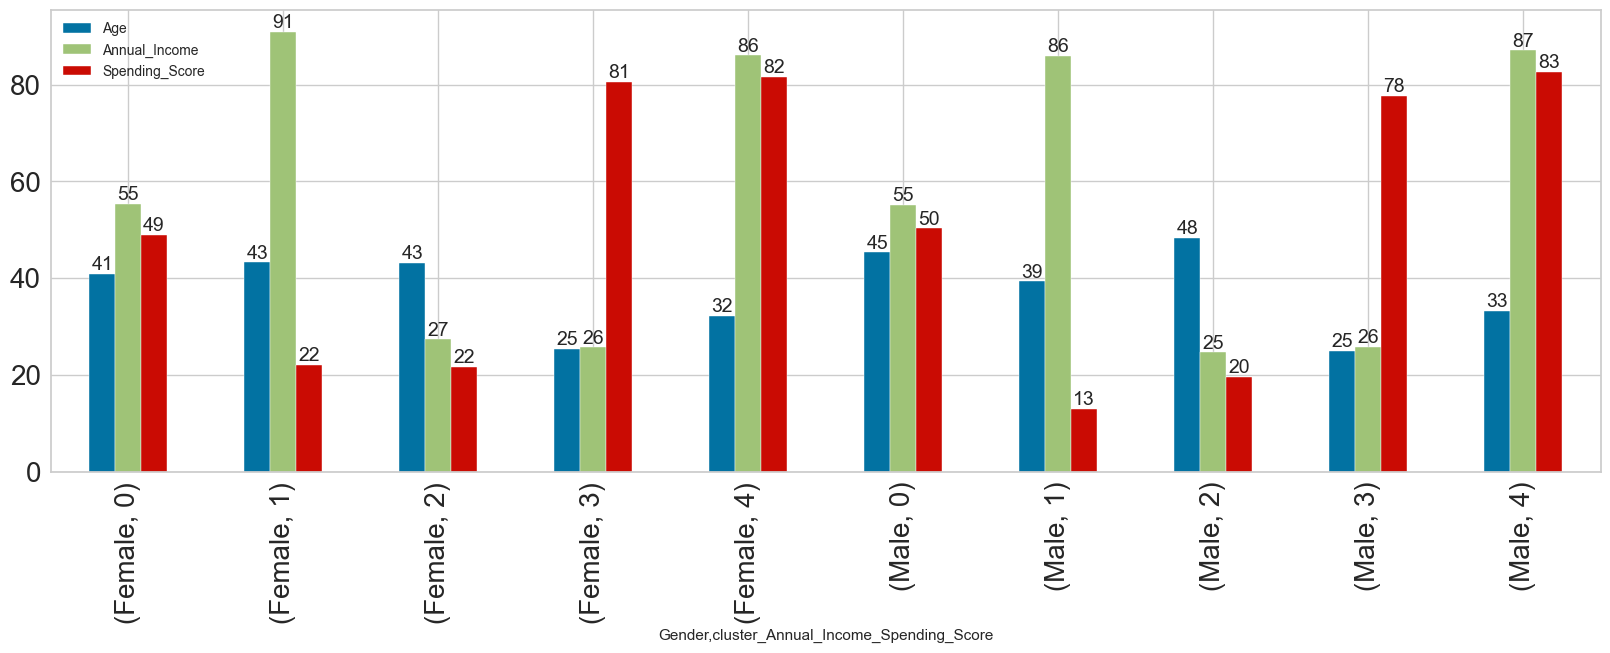

In [94]:
ax = df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean().plot(kind="bar",
                                                                                figsize=(20,6),
                                                                                fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=14)

## Conclusion

### Female

**cluster 0** : The average age is around 41, both annual_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 43, the annual_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 43. Both annual_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 32, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annual_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 39, the annual_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 48. Both annual_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 33, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

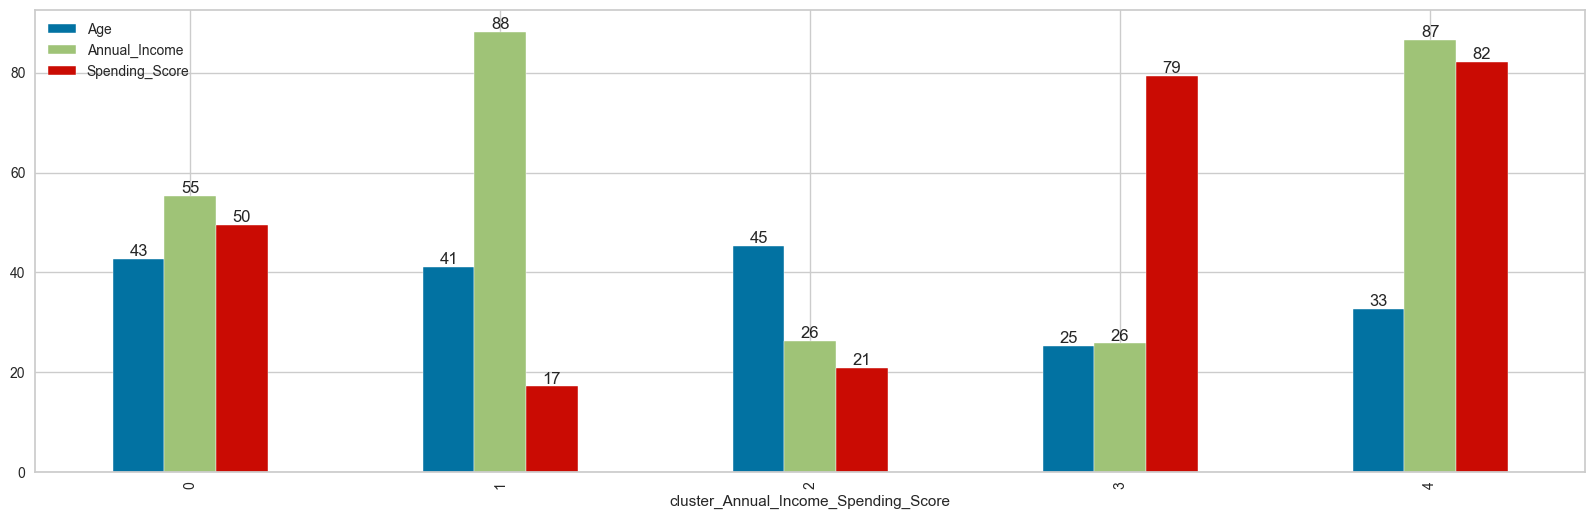

In [95]:
ax = df.drop(columns = 'Gender').groupby("cluster_Annual_Income_Spending_Score").mean().plot(kind='bar', figsize = (20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")

**cluster 0** : The average age is around 43, both annual_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 41, the annual_income is very high but the spending_scores is very low. This group is our target audience and special strategies need to be developed for this group.

**cluster 2** :The average age is around 45. Both annual_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 33, the annual income and the spending_score is very high. This group consists of our loyal customers. Our company derives the main profit from this group. Very special promotions can be made in order not to miss it.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___